Abhishek R

ashek6578@gmail.com

batch number : DS2310      

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df = df.drop('ID', axis = 1)

In [4]:
ordinal_encoder = OrdinalEncoder(categories= [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
encoded_months = ordinal_encoder.fit_transform(df[['month']])
df['month'] = encoded_months

ordinal_encoder = OrdinalEncoder(categories= [['unknown', 'success', 'failure', 'other']])
ep = ordinal_encoder.fit_transform(df[['poutcome']])
df['poutcome'] = ep

ordinal_encoder = OrdinalEncoder(categories= [['unknown', 'secondary', 'tertiary', 'primary']])
ed = ordinal_encoder.fit_transform(df[['education']])
df['education'] = ed

ordinal_encoder = OrdinalEncoder(categories= [['married', 'divorced', 'single']])
em = ordinal_encoder.fit_transform(df[['marital']])
df['marital'] = em

ordinal_encoder = OrdinalEncoder(categories= [['admin.', 'unknown', 'services', 'management', 'technician','retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed']])
ej = ordinal_encoder.fit_transform(df[['job']])
df['job'] = ej

ordinal_encoder = OrdinalEncoder(categories= [['telephone', 'cellular', 'unknown']])
ec = ordinal_encoder.fit_transform(df[['contact']])
df['contact'] = ec

In [5]:
list = ['default','housing','subscribed', 'loan'  ]
for i in list:
    df[i] = df[i].apply(lambda x : 0 if x == 'no' else 1)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  float64
 2   marital     31647 non-null  float64
 3   education   31647 non-null  float64
 4   default     31647 non-null  int64  
 5   balance     31647 non-null  int64  
 6   housing     31647 non-null  int64  
 7   loan        31647 non-null  int64  
 8   contact     31647 non-null  float64
 9   day         31647 non-null  int64  
 10  month       31647 non-null  float64
 11  duration    31647 non-null  int64  
 12  campaign    31647 non-null  int64  
 13  pdays       31647 non-null  int64  
 14  previous    31647 non-null  int64  
 15  poutcome    31647 non-null  float64
 16  subscribed  31647 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 4.1 MB


In [8]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.326824,0.678548,1.556230,0.018485,1363.890258,0.555629,0.162132,1.225298,15.835466,5.146839,258.113534,2.765697,39.576042,0.574272,0.368313,0.117389
std,10.625134,2.672978,0.884302,0.796085,0.134700,3028.304293,0.496904,0.368578,0.551283,8.337097,2.406218,257.118973,3.113830,99.317592,2.422529,0.830267,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,0.000000,1.000000,0.000000,73.000000,0.000000,0.000000,1.000000,8.000000,4.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,0.000000,1.000000,0.000000,450.000000,1.000000,0.000000,1.000000,16.000000,5.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,7.000000,318.500000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [9]:
df.skew()

age            0.681607
job            0.444613
marital        0.673740
education      0.472162
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.050474
day            0.087185
month          0.249339
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome       2.045965
subscribed     2.377445
dtype: float64

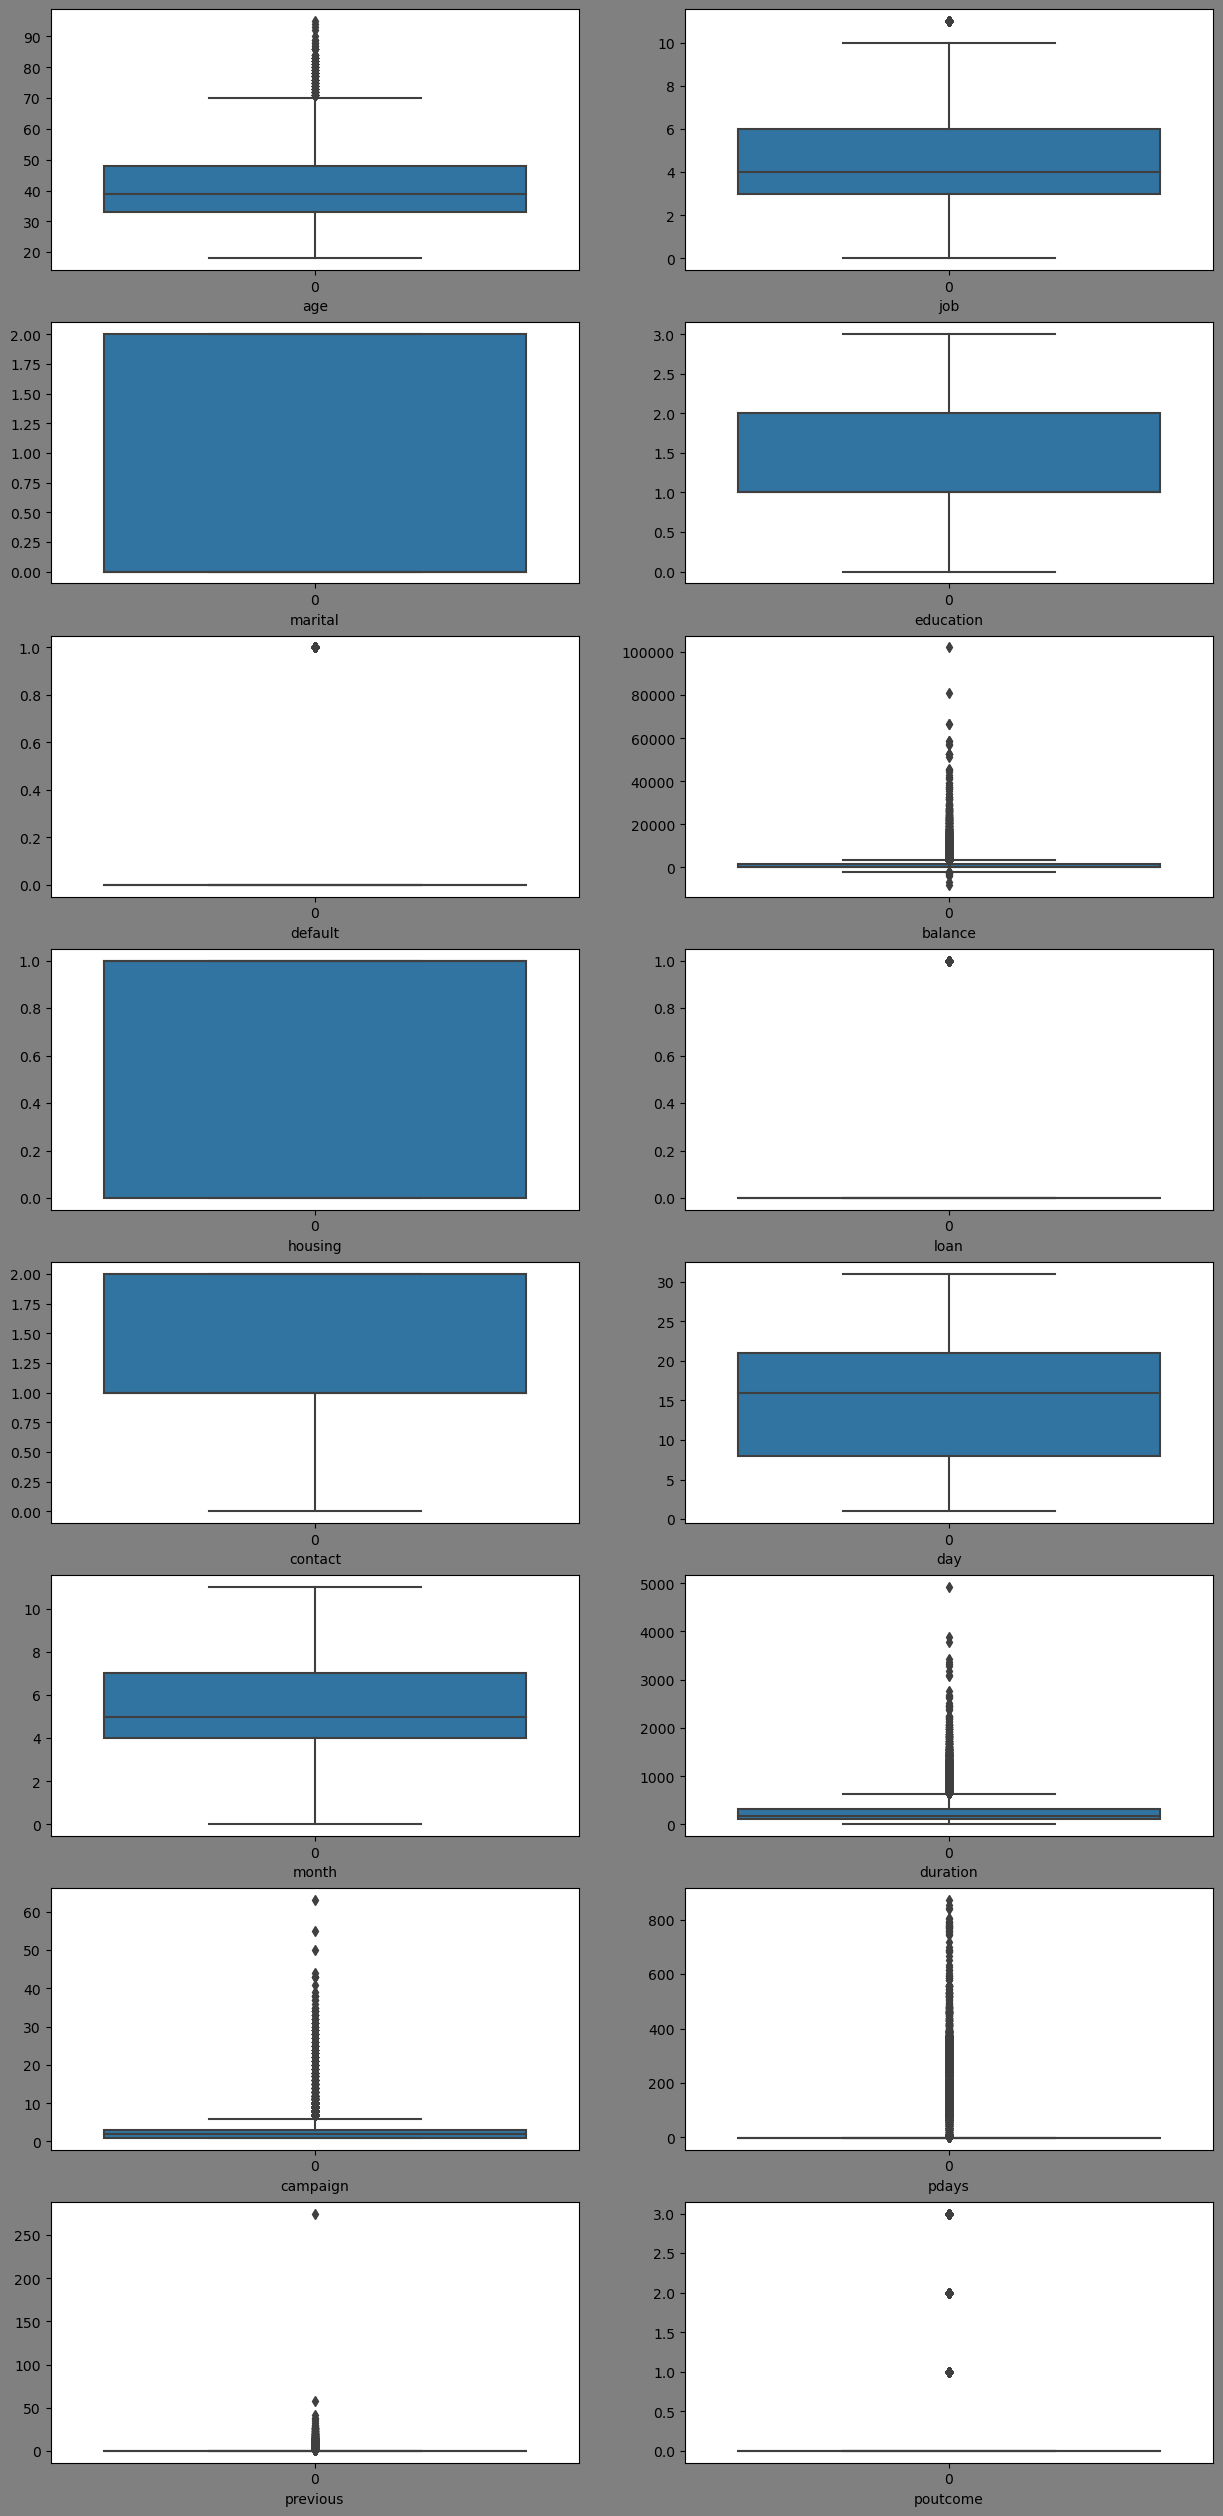

In [10]:
plt.figure( figsize = (15, 40), facecolor= 'grey')
pn = 1
for i in df:
    if pn < 17:
        ax= plt.subplot(10,2, pn)
        sns.boxplot(df[i])
        plt.xlabel(i)
        pn += 1

<Axes: >

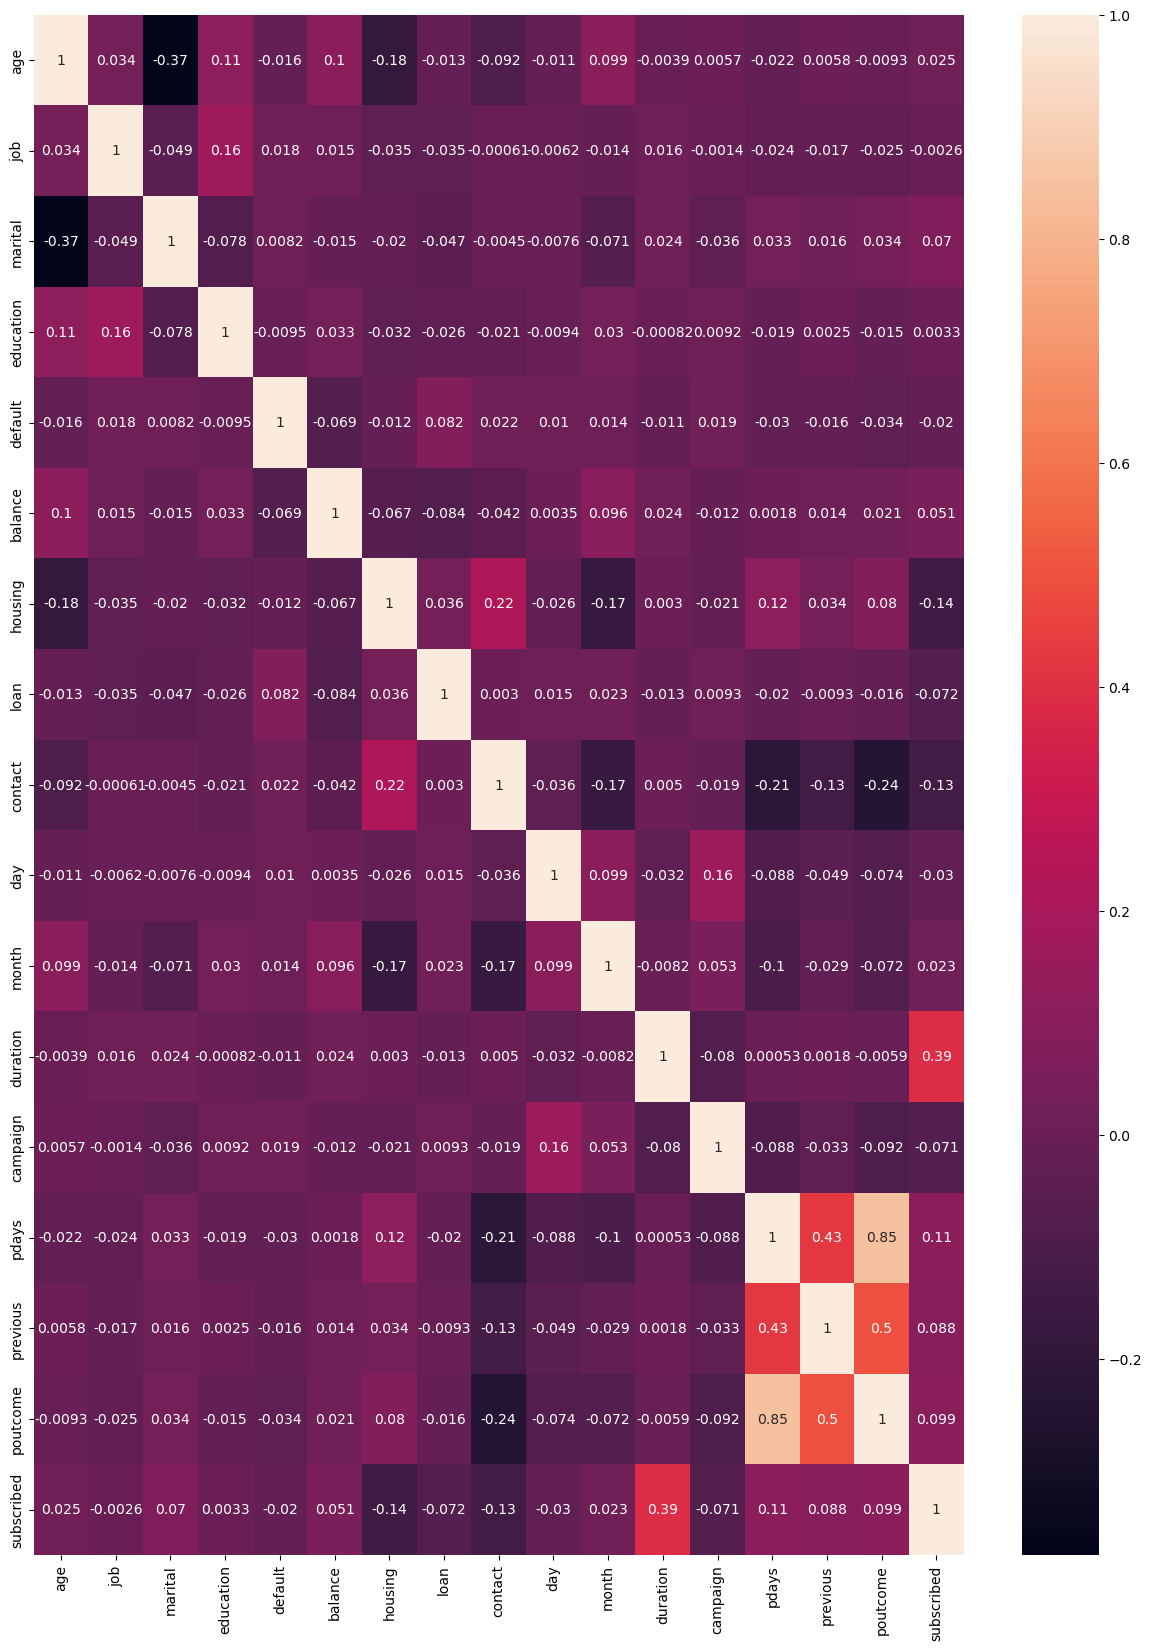

In [11]:
plt.figure(figsize = (15, 20))
sns.heatmap(df.corr(), annot = True)

* as the correlation matrix the 'pdays' and 'poutcome' are showing the multicolinearity issue
* we cant remove a column which shows the multicolinearity because both the columns are important

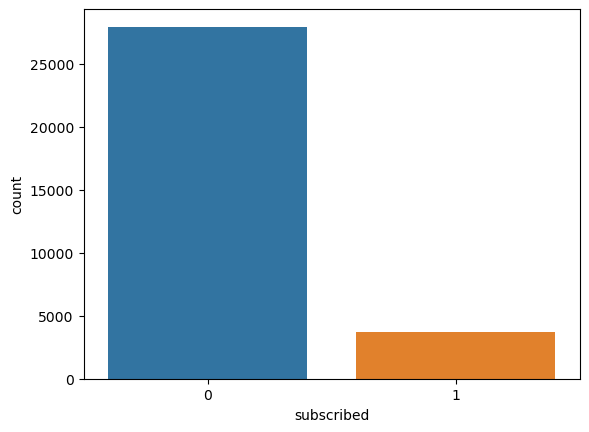

In [12]:
sns.countplot(data=df, x='subscribed')
plt.show()

In [13]:
df['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

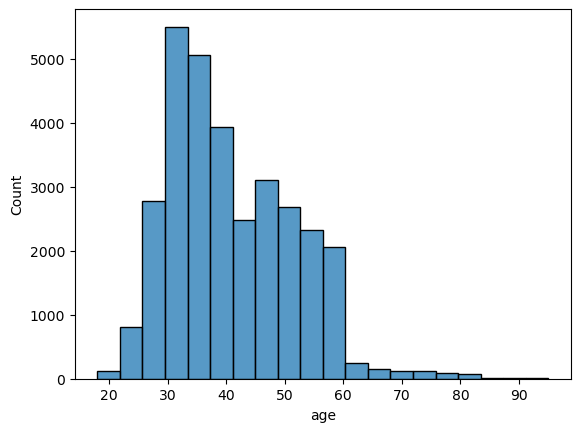

In [14]:
sns.histplot(x='age', data=df, bins=20)

* from this i observed that the more customers applied at the age is 

In [15]:
cf  = ['age', 'balance']
for cn in cf:
    q1 = df[cn].quantile(0.25)
    q3 = df[cn].quantile(0.75)
    iqr = q3 - q1
    lb = q3 - 1.5 * iqr
    df = df[df[cn] >= lb]
df = df.reset_index(drop=True)
df.shape


(30401, 17)

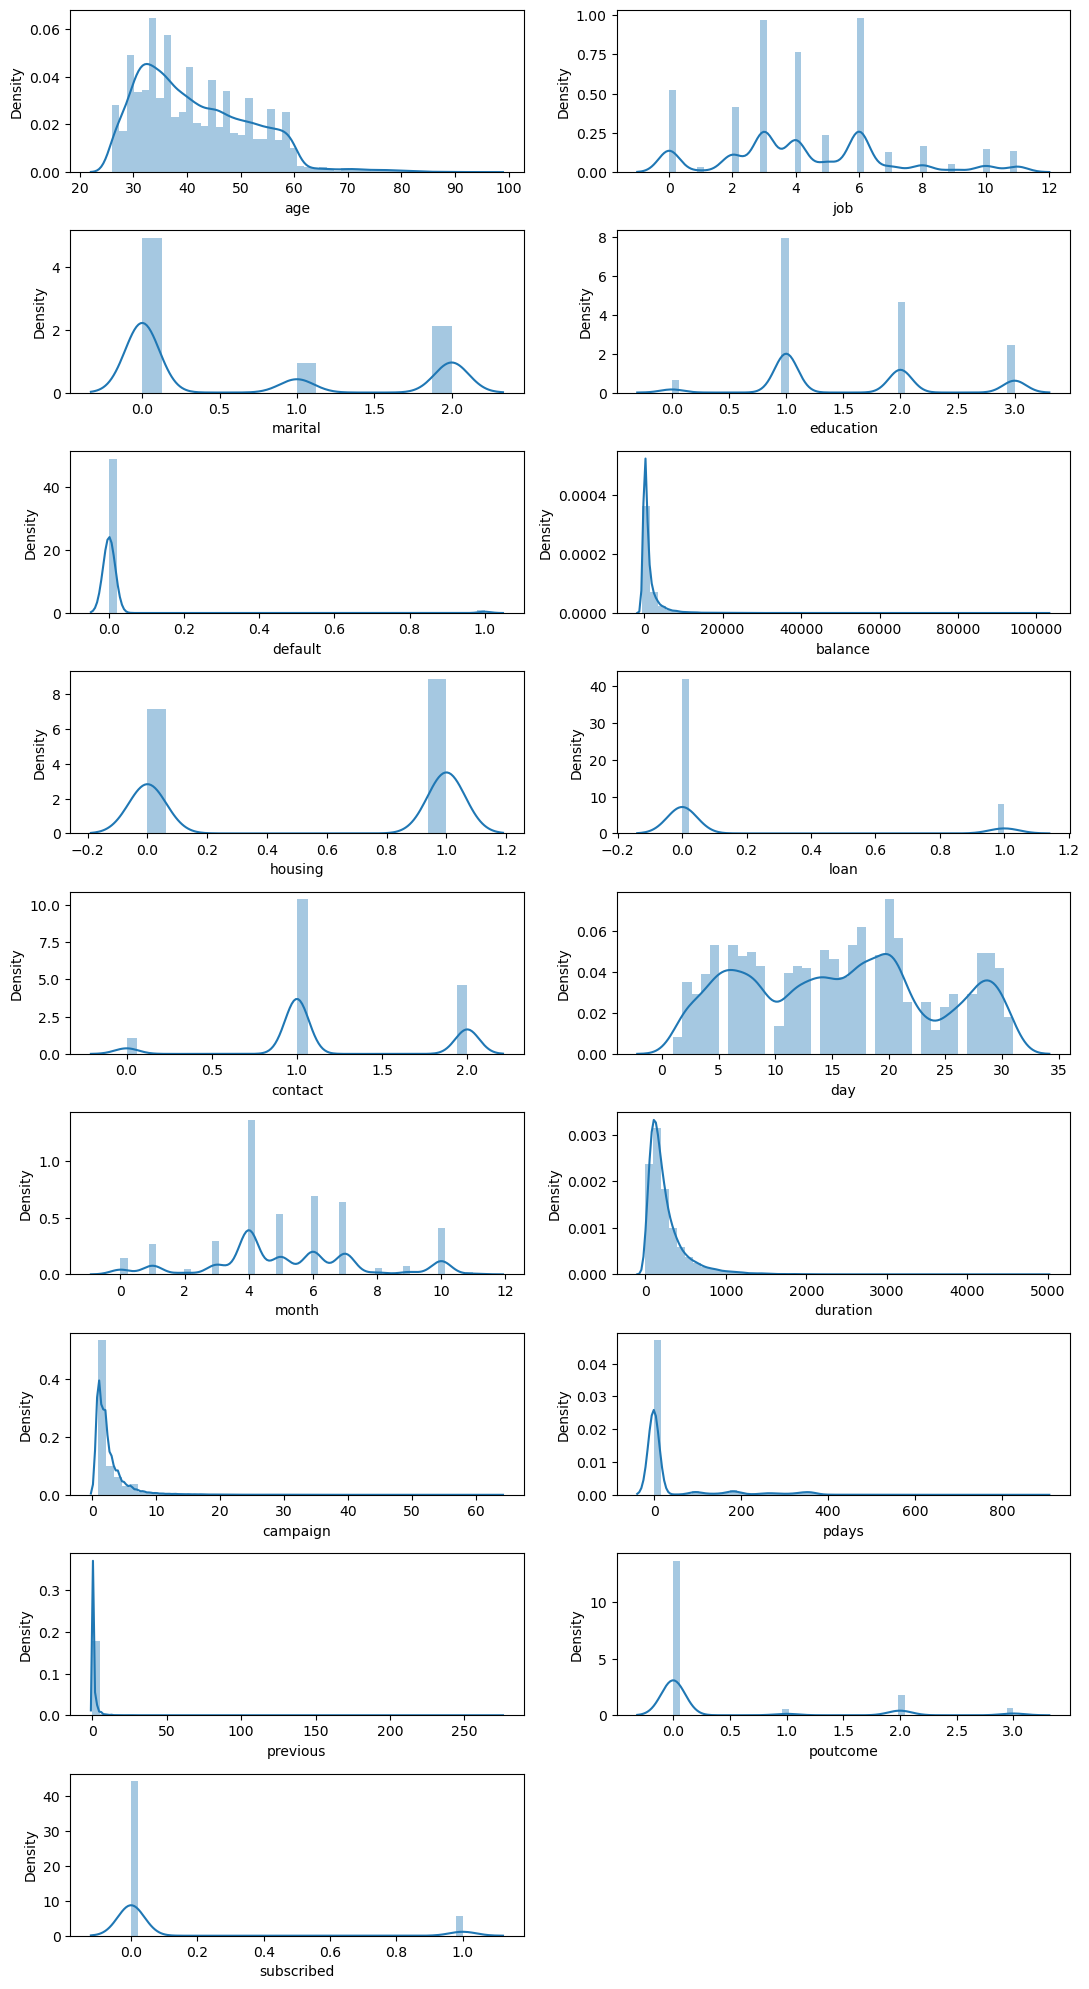

In [16]:
plt.figure(figsize=(11, 20))
a = 1 

for i in df.columns:
    if a <= 17:
        plt.subplot(9, 2, a)
        sns.distplot(df[i])
        plt.xlabel(i)
        a += 1

plt.tight_layout() 
plt.show()

In [17]:
columns_to_transform = ['duration', 'campaign', 'pdays', 'previous', 'balance']
for column in columns_to_transform:
    df[column] = np.log(df[column] - df[column].min() + 1)

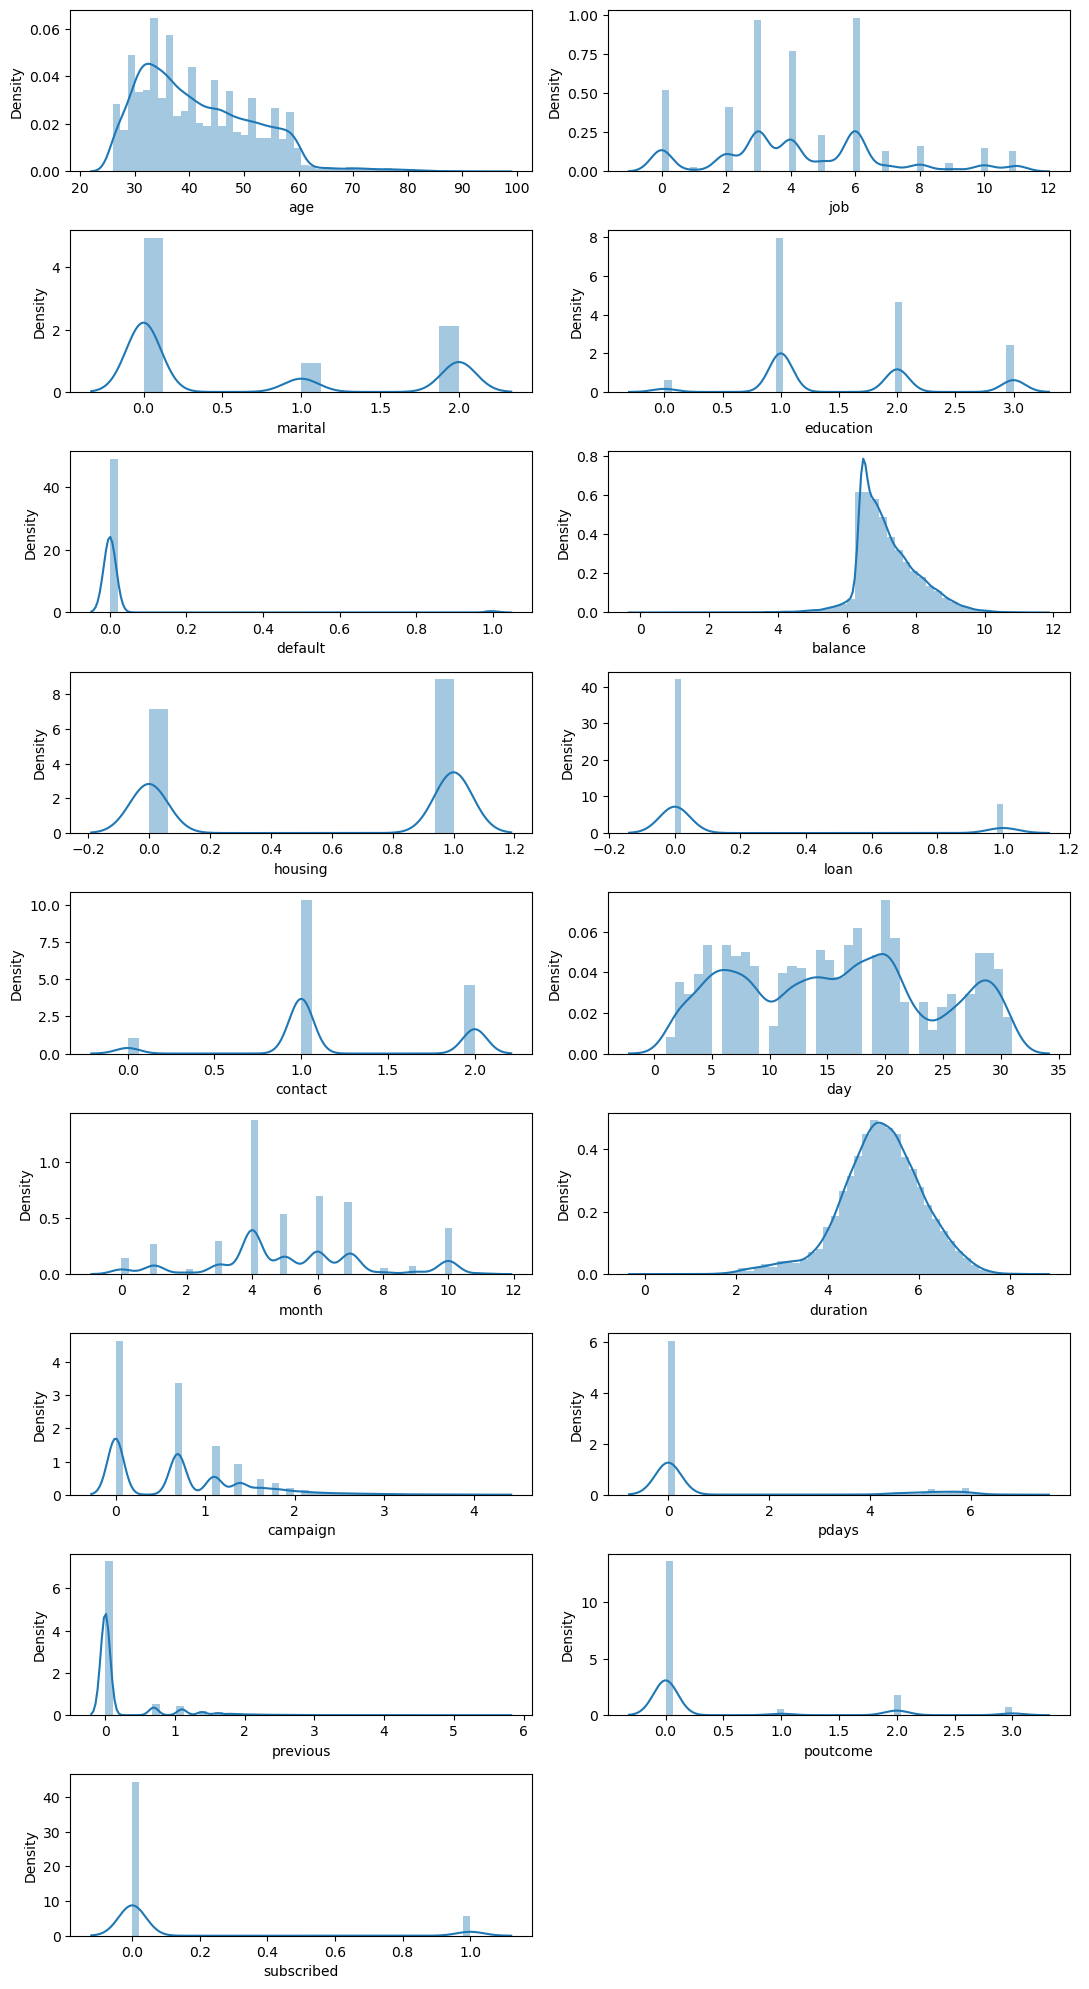

In [18]:
plt.figure(figsize=(11, 20))
a = 1 

for i in df.columns:
    if a <= 17:
        plt.subplot(9, 2, a)
        sns.distplot(df[i])
        plt.xlabel(i)
        a += 1

plt.tight_layout() 
plt.show()

In [19]:
x= df.drop('subscribed', axis = 1)
y = df['subscribed']

In [20]:
y.value_counts()

0    26923
1     3478
Name: subscribed, dtype: int64

* as the above counts i move with the upsampling techniques

In [21]:
oversampler = SMOTE(sampling_strategy='minority')
xo, yo = oversampler.fit_resample(x, y)

In [22]:
yo.value_counts()

0    26923
1    26923
Name: subscribed, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(xo, yo, test_size=0.01, random_state=146)

In [24]:
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [25]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 83.56%

 ============ test result ==========
test result is: 81.08%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 90.72%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 94.99%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 90.63%

 ============ test result ==========
test result is: 89.05%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 92.99%

 ============ test result ==========
test result is: 91.47%

================== SVC ==================

 ============ train result =

In [26]:
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, xo, yo, cv=5) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.79879294 0.84984678 0.84789674 0.84083945 0.83712508]
Mean Cross-Validation Score: 0.8349001988495987
Test Accuracy: 0.8108
Difference between Accuracy score and cross-validation ofLogisticRegression() score is -0.024139530946073573

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.80222841 0.92989135 0.92645557 0.93314142 0.92877705]
Mean Cross-Validation Score: 0.9040987607315023
Test Accuracy: 0.9072
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.003136860789833551

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.83528319 0.96508497 0.96378494 0.96508497 0.96118488]
Mean Cross-Validation Score: 0.9380845894104549
Test Accuracy: 0.9425
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is 0.0044014959327732806

================== AdaBoost

* according to the above results, i like to move to hyper para meter tuning with the LogisticRegression and SVC 

In [30]:
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001]}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy',n_jobs = -1)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1}


In [31]:
from sklearn.svm import SVC
final_svc = SVC(C=10, gamma=0.1)
final_svc.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [32]:
pred1 = final_svc.predict(x_test)
acc = accuracy_score(y_test, pred1)
print(acc*100)

96.47495361781077


In [33]:
import joblib
joblib.dump(final_svc,'subscribe.pkl')

['subscribe.pkl']

In [34]:
df2 = pd.read_csv('termdeposit_train.csv')
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [35]:
ordinal_encoder = OrdinalEncoder(categories= [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])
encoded_months = ordinal_encoder.fit_transform(df2[['month']])
df2['month'] = encoded_months

ordinal_encoder = OrdinalEncoder(categories= [['unknown', 'success', 'failure', 'other']])
ep = ordinal_encoder.fit_transform(df2[['poutcome']])
df2['poutcome'] = ep

ordinal_encoder = OrdinalEncoder(categories= [['unknown', 'secondary', 'tertiary', 'primary']])
ed = ordinal_encoder.fit_transform(df2[['education']])
df2['education'] = ed

ordinal_encoder = OrdinalEncoder(categories= [['married', 'divorced', 'single']])
em = ordinal_encoder.fit_transform(df2[['marital']])
df2['marital'] = em

ordinal_encoder = OrdinalEncoder(categories= [['admin.', 'unknown', 'services', 'management', 'technician','retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed']])
ej = ordinal_encoder.fit_transform(df2[['job']])
df2['job'] = ej

ordinal_encoder = OrdinalEncoder(categories= [['telephone', 'cellular', 'unknown']])
ec = ordinal_encoder.fit_transform(df2[['contact']])
df2['contact'] = ec

In [36]:
list = ['default','housing','subscribed', 'loan'  ]
for i in list:
    df2[i] = df2[i].apply(lambda x : 0 if x == 'no' else 1)

In [37]:
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0.0,0.0,0.0,0,1933,0,0,0.0,19,10.0,44,2,-1,0,0.0,0
1,40576,31,1.0,0.0,1.0,0,3,0,0,1.0,20,6.0,91,2,-1,0,0.0,0
2,15320,27,2.0,0.0,1.0,0,891,1,0,1.0,18,6.0,240,1,-1,0,0.0,0
3,43962,57,3.0,1.0,2.0,0,3287,0,0,1.0,22,5.0,867,1,84,3,1.0,1
4,29842,31,4.0,0.0,1.0,0,119,1,0,1.0,4,1.0,380,1,-1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,3.0,2.0,2.0,0,0,1,0,1.0,12,4.0,116,2,-1,0,0.0,0
31643,40178,53,3.0,1.0,2.0,0,380,0,1,1.0,5,5.0,438,2,-1,0,0.0,1
31644,19710,32,3.0,2.0,2.0,0,312,0,0,1.0,7,7.0,37,3,-1,0,0.0,0
31645,38556,57,4.0,0.0,1.0,0,225,1,0,0.0,15,4.0,22,7,337,12,2.0,0


In [38]:
x1 = df2.drop(['subscribed', 'ID'], axis  = 1)
y1 = df2['subscribed']

In [39]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0.0,0.0,0.0,0,1933,0,0,0.0,19,10.0,44,2,-1,0,0.0
1,31,1.0,0.0,1.0,0,3,0,0,1.0,20,6.0,91,2,-1,0,0.0
2,27,2.0,0.0,1.0,0,891,1,0,1.0,18,6.0,240,1,-1,0,0.0
3,57,3.0,1.0,2.0,0,3287,0,0,1.0,22,5.0,867,1,84,3,1.0
4,31,4.0,0.0,1.0,0,119,1,0,1.0,4,1.0,380,1,-1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,3.0,2.0,2.0,0,0,1,0,1.0,12,4.0,116,2,-1,0,0.0
31643,53,3.0,1.0,2.0,0,380,0,1,1.0,5,5.0,438,2,-1,0,0.0
31644,32,3.0,2.0,2.0,0,312,0,0,1.0,7,7.0,37,3,-1,0,0.0
31645,57,4.0,0.0,1.0,0,225,1,0,0.0,15,4.0,22,7,337,12,2.0


In [40]:
model= joblib.load('subscribe.pkl')
pred0= model.predict(x1)
ac = accuracy_score(pred0 , y1)
ac*100

88.26113059689702